Učitavanje potrebnih biblioteka

In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

Učitavanje trening seta, kao i odgovarajućih labela

In [2]:
train_data = []
train_labels = []

for letter in os.listdir('asl_alphabet_train/asl_alphabet_train'):
    for image in os.listdir('asl_alphabet_train/asl_alphabet_train/' + letter):
        img = Image.open('asl_alphabet_train/asl_alphabet_train/' + letter + '/' + image)
        img = np.array(img) 
        train_data.append(img)
        train_labels.append(letter)

In [3]:
train_data, train_labels = np.array(train_data), np.array(train_labels) # konverzija u numpy array

In [4]:
print('Data shape:', train_data.shape)              # dimenzije podataka
print('Labels shape:', train_labels.shape)          # dimenzije labela
print('Unique labels:', np.unique(train_labels))    # jedinstvene labele

Data shape: (87000, 200, 200, 3)
Labels shape: (87000,)
Unique labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


Čuvanje podataka radi lakšeg ponovnog učitavanja

In [5]:
np.save('train_data.npy', train_data)
np.save('train_labels.npy', train_labels)

Učitavanje test seta, kao i odgovarajućih labela

In [6]:
test_data = []
test_labels = []

for letter in os.listdir('asl_alphabet_test/asl_alphabet_test'):
    img = Image.open('asl_alphabet_test/asl_alphabet_test/' + letter)
    img = np.array(img) 
    test_data.append(img)
    test_labels.append(letter.split('_')[0])

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [7]:
print('Test data shape:', test_data.shape)        # dimenzije podataka
print('Test labels shape:', test_labels.shape)    # dimenzije labela
print('Unique labels:', np.unique(test_labels))   # jedinstvene labele

Test data shape: (28, 200, 200, 3)
Test labels shape: (28,)
Unique labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'nothing' 'space']


Čuvanje podataka radi lakšeg ponovnog učitavanja

In [8]:
np.save('test_data.npy', test_data)
np.save('test_labels.npy', test_labels)

Prikaz primera iz različitih klasa

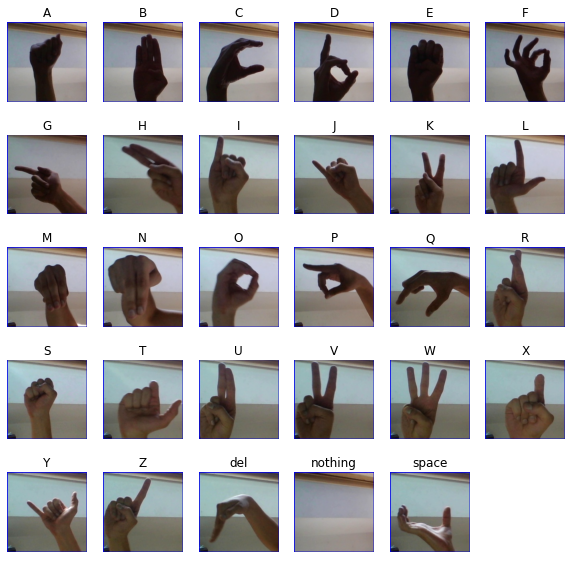

In [11]:
fig, axes = plt.subplots(5, 6, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data[train_labels == np.unique(train_labels)[i]][0])
    ax.axis('off')
    ax.set_title(np.unique(train_labels)[i])
    if i == 28:
        break
axes[4, 5].axis('off')
plt.show()